In [1]:
# A system is linear if it satisfies the principles of superposition and homogeneity.

# superposition means that the response caused by two or more inputs is the sum of the responses that would have been caused by each input individually.
# T{x1 + x2} = T{x1} + T{x2}

# Homogeneity means that if an input is scaled by a constant factor, the output is also scaled by the same factor.
# T{a*x} = a*T{x}


# A system is time-invariant if its behavior and characteristics do not change over time.
# A time-invariant system's behavior and characteristics do not change over time; its response to a given input is the same regardless of when the input is applied.

# An example of a nonlinear system is the human nervous system. If you are exposed to lots of stimuli over the day,
# your response to a given stimulus is probably less than if you were exposed to that stimulus in the morning.

In [57]:
import numpy as np

def eval_diff_eq(x: np.ndarray, b_coeffs: np.ndarray, a_coeffs: np.ndarray, max_out: int) -> np.ndarray:

    M = len(b_coeffs) - 1
    N = len(a_coeffs) - 1

    y = np.zeros(max_out)

    for n in range(max_out):
        # MA part (feedforward)
        for k in range(M + 1):
            if n - k >= 0:
                y[n] += b_coeffs[k] * x[n - k]

        # AR part (feedback)
        for k in range(1, N + 1):
            if n - k >= 0:
                y[n] -= a_coeffs[k] * y[n - k]

        # normalize
        y[n] /= a_coeffs[0]

    return y

In [58]:
# Given:

# b0 = 0.25  
# b1 = 0.5  
# b2 = 0.25  
# a1 = 0.5  

# difference equation:

# y(n) = b0 x(n) + b1 x(n−1) + b2 x(n−2) − a1 y(n−1)

# Input signal:

# x(0)=1, x(1)=2, x(2)=0, x(3)=2, x(4)=1, x(5)=0  

# 1. n = 0  
# y(0) = 0.25*1 + 0 + 0 − 0.5*0 = 0.25

# 2. n = 1  
# y(1) = 0.25*2 + 0.5*1 + 0 − 0.5*0.25  
#       = 0.5 + 0.5 − 0.125  
#       = 0.875

# 3. n = 2  
# y(2) = 0.25*0 + 0.5*2 + 0.25*1 − 0.5*0.875  
#       = 0 + 1 + 0.25 − 0.4375  
#       = 0.8125

# 4. n = 3  
# y(3) = 0.25*2 + 0.5*0 + 0.25*2 − 0.5*0.8125  
#       = 0.5 + 0 + 0.5 − 0.40625  
#       = 0.59375

# 5. n = 4  
# y(4) = 0.25*1 + 0.5*2 + 0.25*0 − 0.5*0.59375  
#       = 0.25 + 1 + 0 − 0.296875  
#       = 0.953125

# 6. n = 5  
# x(5)=0  
# y(5) = 0.25*0 + 0.5*1 + 0.25*2 − 0.5*0.953125  
#       = 0 + 0.5 + 0.5 − 0.4765625  
#       = 0.5234375

# output sequence y(n):
# {0.25, 0.875, 0.8125, 0.59375, 0.953125, 0.5234375}

x = np.array([1, 2, 0, 2, 1], float)

x_padded = np.append(x, 0.0)

b = np.array([0.25, 0.5, 0.25], float)
a = np.array([1.0, 0.5], float)

y_from_function = eval_diff_eq(x_padded, b, a, max_out=6)
print(y_from_function)

[0.25      0.875     0.8125    0.59375   0.953125  0.5234375]


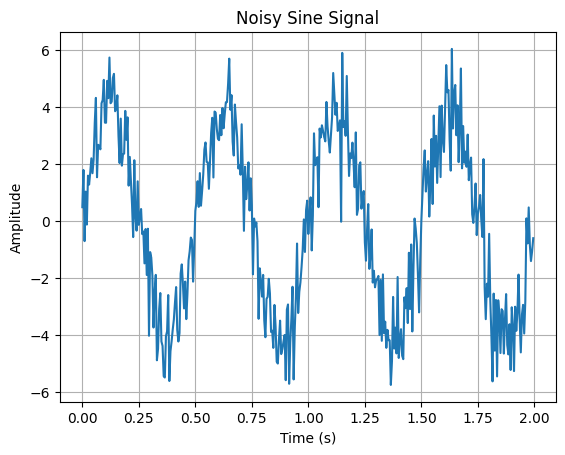

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 200          # Sampling rate in Hz
f = 2             # Frequency of the sine wave in Hz
A = 4             # Amplitude
t = np.arange(0, 2, 1/fs)   # Time vector from 0 to 2 seconds

# Generate sine wave
x = A * np.sin(2 * np.pi * f * t)

# Generate noise
noise = np.random.randn(len(t))

# Add noise to the sine wave
x_noisy = x + noise

# Plot the noisy signal
plt.figure()
plt.plot(t, x_noisy)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Noisy Sine Signal")
plt.grid(True)
plt.show()

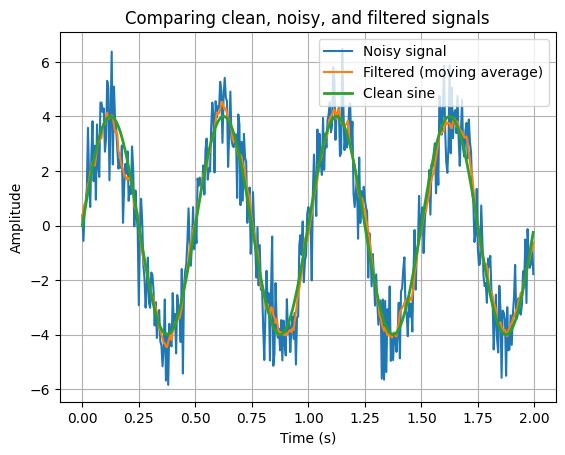

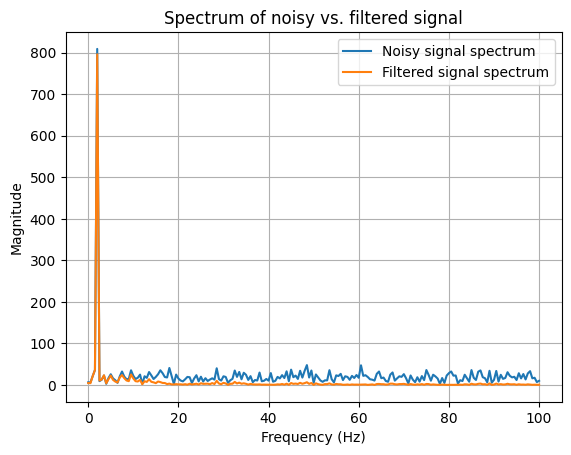

In [60]:
# 1. How must the b‑coefficients be chosen?

# You want a system that outputs the average of the last d samples.  
# With all ak = 0, the system is a FIR filter.

# The moving‑average filter of length d is:

# y(n) = (1/d) * [ x(n) + x(n−1) + x(n−2) + ... + x(n−(d−1)) ]

# Thus, the FIR coefficients are:

# b0 = b1 = b2 = ... = b(d−1) = 1/d  
# All remaining b‑coefficients = 0.

# This creates a d‑point moving average filter.

# 2. How does changing d affect the output?

# Small d (e.g., 3–5):
# light smoothing  
# fast reaction to changes  
# noise reduction is mild  
# sine wave shape stays sharp

# Large d (e.g., 20–50):
# strong smoothing  
# noise reduction is strong  
# amplitude of the sine is reduced  
# the signal becomes delayed and rounded

# Typical good compromise: d ≈ 8–15.

# 3. code

import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 200        # Sampling rate in Hz
f = 2           # Frequency of the sine wave
A = 4           # Amplitude
t = np.arange(0, 2, 1/fs)   # Time vector

# Clean sine wave
x = A * np.sin(2 * np.pi * f * t)

# Generate noise
noise = np.random.randn(len(t))
x_noisy = x + noise

# Choose window size d for moving average
d = 10

# Moving average filter coefficients
b = np.ones(d) / d   # normalized FIR coefficients

# Apply filter (convolution)
y = np.convolve(x_noisy, b, mode='same')

# Plot clean, noisy, and filtered signals
plt.figure()
plt.plot(t, x_noisy, label='Noisy signal')
plt.plot(t, y, label='Filtered (moving average)')
plt.plot(t, x, label='Clean sine', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Comparing clean, noisy, and filtered signals")
plt.grid(True)
plt.legend()
plt.show()


# 4. Spectrum of the noisy signal and the filtered signal


import numpy as np
import matplotlib.pyplot as plt

# Compute FFTs
X_noisy = np.fft.rfft(x_noisy)
Y = np.fft.rfft(y)
freqs = np.fft.rfftfreq(len(t), 1/fs)

# Plot magnitude spectra
plt.figure()
plt.plot(freqs, np.abs(X_noisy), label='Noisy signal spectrum')
plt.plot(freqs, np.abs(Y), label='Filtered signal spectrum')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Spectrum of noisy vs. filtered signal")
plt.grid(True)
plt.legend()
plt.show()

# 5. What can you observe in the spectra?
# 
# The noisy signal has broadband energy (white noise).  
# The moving average filter acts as a low‑pass filter:  
#  – high frequencies are strongly reduced  
#  – the 2 Hz component remains strong  
# Increasing d increases the low‑pass effect:  
#  – more smoothing  
#  – more noise reduction  
#  – more distortion (attenuation and delay)
# 
# 6. What value of d seems reasonable?
# 
# For this task, a value of:
# 
# d ≈ 10
# 
# is a good compromise:
# 
# noise is noticeably reduced  
# the sine wave shape is preserved  
# amplitude is not overly reduced  
# delay is acceptable


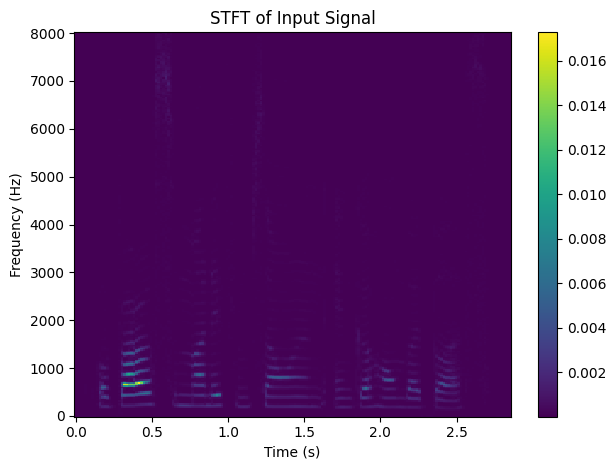

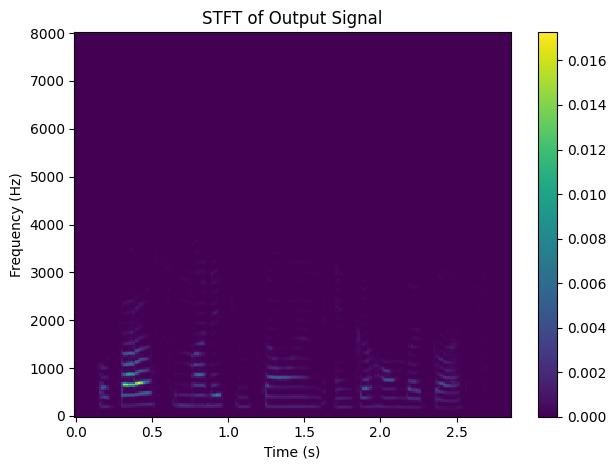

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import lfilter, stft

data = np.load("coeffs.npz")

b = data["b_coeffs"]
a = np.concatenate(([1.0], data["a_coeffs"]))

x, fs = sf.read("speech1.wav")    # x = input audio, fs = sampling rate

# Filter the audio
y = lfilter(b, a, x)

# Compute STFT of input signal
f_in, t_in, Z_in = stft(x, fs=fs, nperseg=512)

# Compute STFT of output signal
f_out, t_out, Z_out = stft(y, fs=fs, nperseg=512)

# Plot STFT of input signal
plt.figure()
plt.pcolormesh(t_in, f_in, np.abs(Z_in))
plt.title("STFT of Input Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar()
plt.tight_layout()
plt.show()

# Plot STFT of output signal
plt.figure()
plt.pcolormesh(t_out, f_out, np.abs(Z_out))
plt.title("STFT of Output Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar()
plt.tight_layout()
plt.show()


In [5]:
# • If the output shows reduced high‑frequency energy  
  # → it is a low‑pass filter, smoothing the speech.
# 
# • If the output shows reduced low‑frequency energy  
  # → it is a high‑pass filter, removing rumble.
# 
# • If the output only keeps a middle frequency band  
  # → it is a band‑pass filter, emphasizing speech formants.
# 
# • If the output boosts certain frequency bands  
  # → it is an equalizer‑type filter.
# 
# • If the output looks “whiter”, with flatter spectrum  
  # → it is a whitening / pre‑emphasis filter.

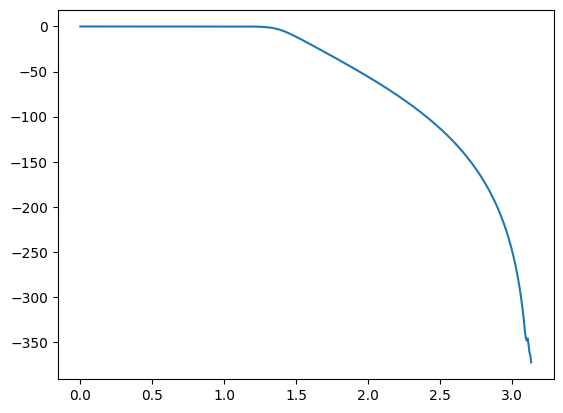

In [ ]:
from scipy.signal import freqz
w, h = freqz(b, a)
plt.plot(w, 20*np.log10(abs(h)))

In [62]:
import numpy as np

def convolve_sequences(x: np.ndarray, h: np.ndarray) -> np.ndarray:
    N = len(x)
    M = len(h)
    y = np.zeros(N + M - 1)

    for n in range(N + M - 1):
        for k in range(N):
            if 0 <= n - k < M:
                y[n] += x[k] * h[n - k]

    return y

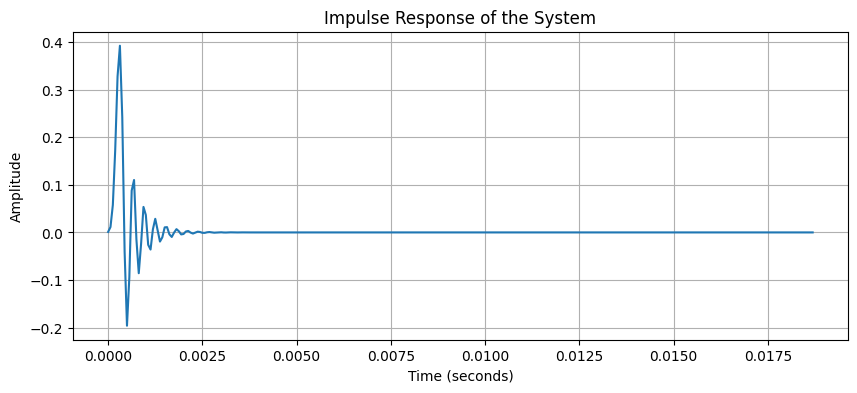

In [67]:
import numpy as np
import matplotlib.pyplot as plt

max_out = 300

def compute_impulse_response(b, a, max_out):
    # create impulse input: 1 at n=0, zeros afterwards
    # The impulse response will have length max_out
    x = np.zeros(max_out)
    x[0] = 1.0  # impulse at time index 0

    # evaluate system response
    h = eval_diff_eq(x, b, a, max_out)

    return h

# Example usage
h = compute_impulse_response(b, a, max_out)

# time axis in seconds
t = np.arange(len(h)) / fs

plt.figure(figsize=(10, 4))
plt.plot(t, h)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Impulse Response of the System")
plt.grid(True)
plt.show()

In [24]:
import numpy as np

# compute convolution
y_conv = convolve_sequences(x, h)

# pad input with zeros to match output length
x_padded = np.zeros(len(y_conv))
x_padded[:len(x)] = x

# run difference equation on padded input
y_diff = eval_diff_eq(x_padded, b, a, max_out=len(y_conv))

# compare
error = np.max(np.abs(y_conv - y_diff))
print("max difference:", error)

max difference: 1.0408340855860843e-16


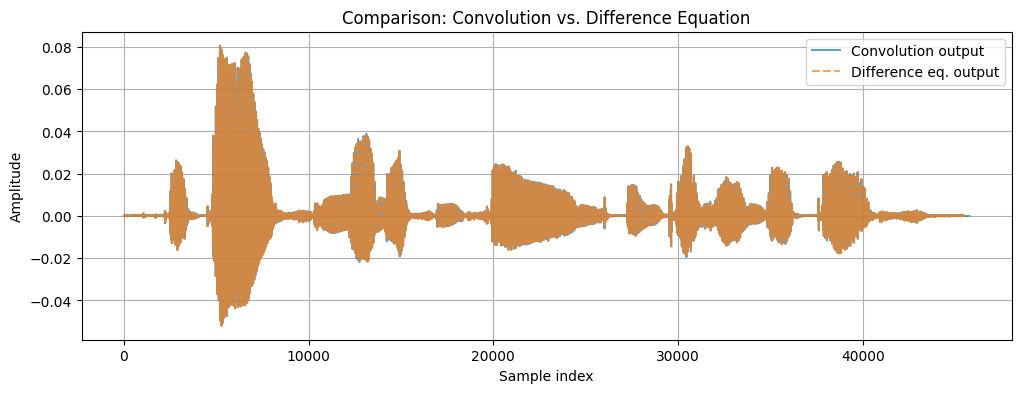

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Convolution output
y_conv = convolve_sequences(x, h)

# 2. Pad input signal so it matches convolution length
x_padded = np.zeros(len(y_conv))
x_padded[:len(x)] = x

# 3. Output from difference equation
y_diff = eval_diff_eq(x_padded, b, a, max_out=len(y_conv))

# 4. Plot both signals
plt.figure(figsize=(12, 4))
plt.plot(y_conv, label="Convolution output", alpha=0.7)
plt.plot(y_diff, label="Difference eq. output", linestyle="dashed", alpha=0.7)
plt.legend()
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.title("Comparison: Convolution vs. Difference Equation")
plt.grid(True)
plt.show()

In [26]:
# Impulse Response (Convolution)  
# Advantages:
# • Very intuitive: shows directly how the system reacts to a single impulse  
# • Works for any LTI system  
# • Easy to visualize and understand the system behavior  
# • Convolution can be computed efficiently using FFT (O(N log N))  
# • Useful for FIR filters or long filters (e.g., reverbs)
# 
# Disadvantages:
# • Impulse responses of IIR systems can be very long (in theory infinite)  
# • Direct (time‑domain) convolution is expensive: O(N · M)  
# • Requires storing many samples if the impulse response is long  
# • Not ideal for real‑time processing when the IR is large
# 
# Difference Equation (AR/MA coefficients)
# 
# Advantages:
# • Very efficient, especially for IIR filters (few coefficients → low cost)  
# • Small memory footprint  
# • Well‑suited for real‑time audio processing  
# • Compact mathematical representation  
# • Direct mapping to DSP hardware implementations
# 
# Disadvantages:
# • Less intuitive than the impulse response  
# • Implementation can become numerically unstable  
# • Harder to visualize what the filter “does”  
# • For long FIR filters, difference equations become inefficient (many b‑coefficients)


In [69]:
import soundfile as sf
import numpy as np

# load audio and impulse response
song, fs = sf.read("mini-christmas-song.wav")
h,  fs_h = sf.read("normalized_church_ir.wav")

# ensure same sampling rate
assert fs == fs_h, "Sampling rates must match"

# perform convolution
y = np.convolve(song, h)

# save result
sf.write("song_with_church_reverb.wav", y, fs)


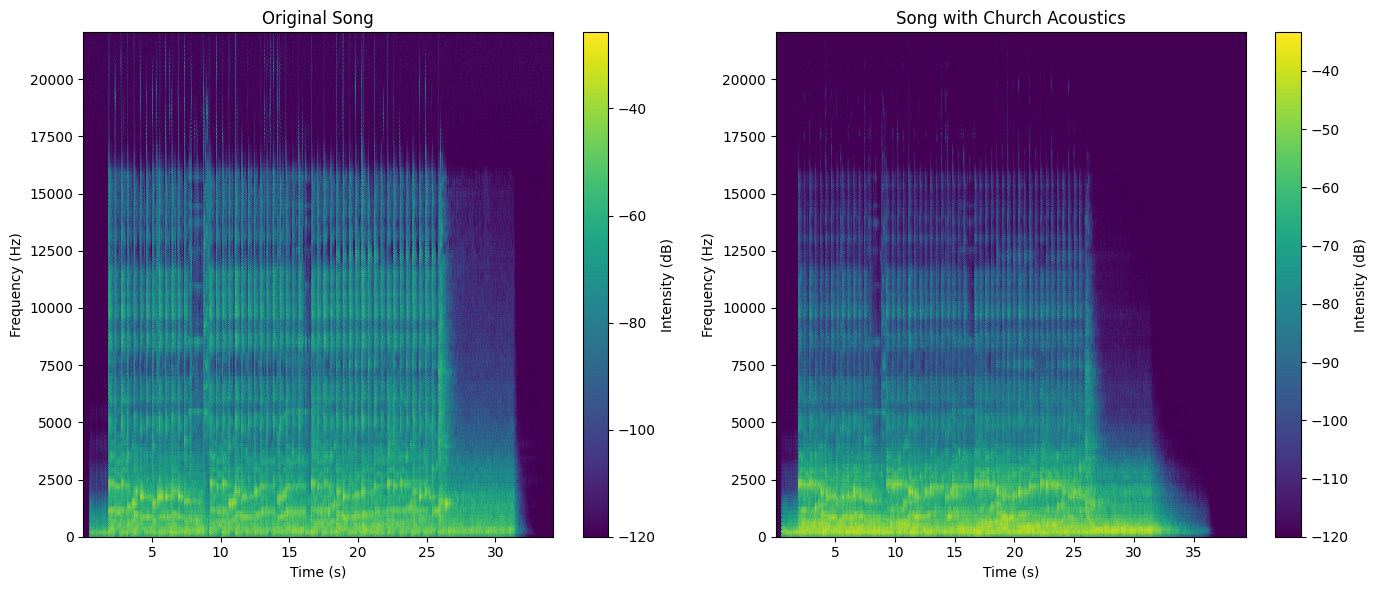

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from scipy.signal import spectrogram

# load audio and impulse response
song, fs = sf.read("mini-christmas-song.wav")
h, fs_h = sf.read("normalized_church_ir.wav")

# apply reverb by convolution
y = np.convolve(song, h)

# compute spectrograms
f1, t1, Sxx1 = spectrogram(song, fs)
f2, t2, Sxx2 = spectrogram(y, fs)

# plotting
plt.figure(figsize=(14, 6))

# original song
plt.subplot(1, 2, 1)
plt.pcolormesh(t1, f1, 10*np.log10(Sxx1 + 1e-12), shading="gouraud")
plt.title("Original Song")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Intensity (dB)")

# song with church reverb
plt.subplot(1, 2, 2)
plt.pcolormesh(t2, f2, 10*np.log10(Sxx2 + 1e-12), shading="gouraud")
plt.title("Song with Church Acoustics")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Intensity (dB)")

plt.tight_layout()
plt.show()

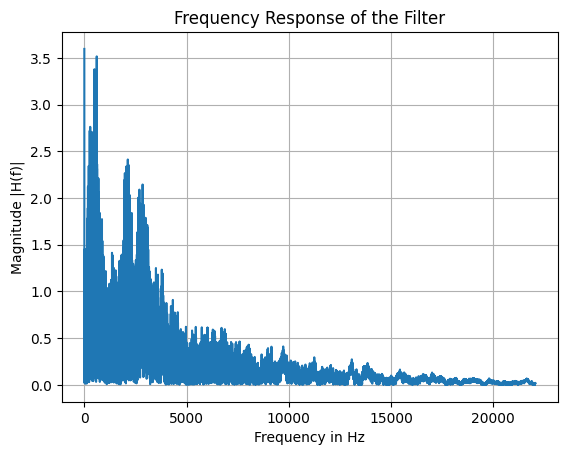

In [72]:
import numpy as np
import matplotlib.pyplot as plt

H = np.fft.fft(h)

# magnitude spectrum
H_abs = np.abs(H)

N = len(H)
frequencies = np.fft.fftfreq(N, 1/fs)
half = N//2
frequencies_plot = frequencies[:half]
H_abs_plot = H_abs[:half]

plt.plot(frequencies_plot, H_abs_plot)
plt.title("Frequency Response of the Filter")
plt.xlabel("Frequency in Hz")
plt.ylabel("Magnitude |H(f)|")
plt.grid(True)
plt.show()

[-9.11079042e-20  1.77007815e-18 -3.72529030e-09 ...  7.02759598e-19
 -8.81747621e-19 -1.06726522e-18]


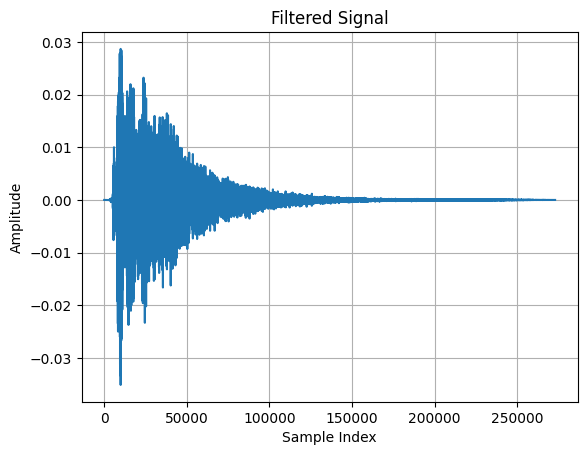

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# x = input signal
# h = impulse response

# make both signals the same length in frequency domain
N = len(x)
M = len(h)
L = N + M - 1

# zero‑padding
x_pad = np.pad(x, (0, L - N))
h_pad = np.pad(h, (0, L - M))

# DFT
X = np.fft.fft(x_pad)
H = np.fft.fft(h_pad)

# multiplication in frequency domain
Y = X * H

# inverse DFT
y_freq = np.fft.ifft(Y).real

# y is now the output of the system (the filtered signal)
print(y_freq)
plt.plot(y_freq)
plt.title("Filtered Signal")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [ ]:
# both signals need to be zero-padded to length N before computing their DFTs to ensure correct linear convolution via the frequency domain.